<a href="https://colab.research.google.com/github/joaoSilvaL/SpotifyMusicClassificationProject/blob/main/Projeto_classifica%C3%A7%C3%A3o_de_m%C3%BAsicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Detalhes da base de dados:**
Um conjunto de dados com várias faixas do Spotify, com cada faixa possuindo características de aúdio associadas a ela.



# **OBJETIVO DO PROJETO:**

Criar um modelo preditivo que classifique músicas como agitadas ou lentas, utilizando o "Spotify Tracks Dataset" do Kaggle.

In [1]:
import pandas as pd

In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('/content/dataset.csv')
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [3]:
df.shape

(114000, 21)

# Criando uma variável target

De acordo com a descrição do dataset, a coluna "valence" é uma medida que varia de 0,0 até 1,0 e que descreve a positividade musical de uma faixa. Faixas com uma valência mais alta soam mais positivas(felizes, eufóricas, animadas), enquanto uma baixa valência soa mais negativa(desanimadas, tristes, melancólicas). Usarei a coluna "valence" como critério de músicas agitadas ou lentas.

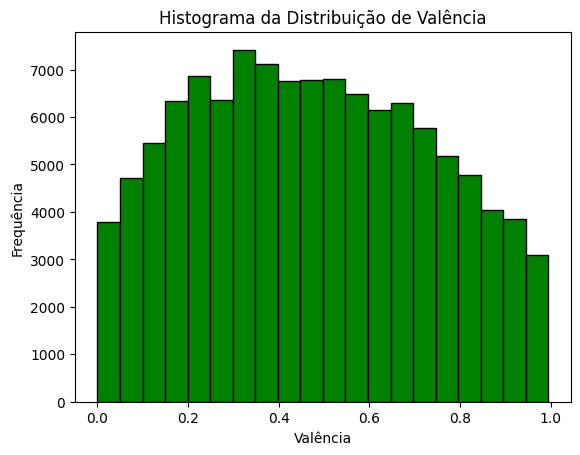

In [4]:
import matplotlib.pyplot as plt

# Criando um histograma da variável "valence"

plt.hist(df['valence'], bins=20, color = 'green', edgecolor='black')
plt.xlabel('Valência')
plt.ylabel('Frequência')
plt.title('Histograma da Distribuição de Valência')
plt.show()

In [5]:
df['valence'].describe()

,valence
count,114000.000000
mean,0.474068
std,0.259261
min,0.000000
25%,0.260000
50%,0.464000
75%,0.683000
max,0.995000


In [6]:
def classificar_valence(row):
  retorno = 'lenta'
  if row['valence'] > 0.5:
    retorno = 'agitada'

  return retorno


# Criação de uma nova coluna "target" utilizando a função "classificar_valence"
df['target'] = df.apply(classificar_valence, axis=1)
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,target
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,agitada
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,lenta
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,lenta
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,lenta
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,lenta


#Feature Engineering

Nesta etapa iremos armazenar um novo DataFrame apenas com as colunas que serão essenciais para a classificação das músicas.

In [7]:
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre', 'target'],
      dtype='object')

In [8]:
df_filtrado = df.drop(['Unnamed: 0', 'track_id'], axis=1)
df_filtrado.head()

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,target
0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,agitada
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,lenta
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,lenta
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,lenta
4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,lenta


# Tratando dados categóricos

LabelEncoder: Classe que será utilizada para codificar os rótulos das classes em números inteiros. Outra técnica comum para isso é a "One-Hot Encoding", porém a mesma aumenta muito a dimensão dos dados, e como o DataFrame possui variáveis com muitas categorias, estarei optando pela "LabelEncoder".

In [9]:
def label_encoder_dataframe(df, columns_to_encode):
  from sklearn.preprocessing import LabelEncoder
  le = LabelEncoder()

  for colum in columns_to_encode:
    if colum in df.columns:
      df[colum] = le.fit_transform(df[colum])
    else:
      print(f'A coluna "{colum}" não existe no DataFrame.')

  return df


columns_to_encode = ['artists', 'album_name', 'track_name', 'explicit', 'track_genre', 'target']
label_encoder_dataframe(df_filtrado, columns_to_encode)
df_filtrado.head()

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,target
0,10357,8100,11741,73,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,0,0
1,3287,14796,22528,55,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,0,1
2,12397,39162,60774,57,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,0,1
3,14839,8580,9580,71,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,0,1
4,5255,16899,25689,82,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,0,1


# Analise das variáveis do modelo

<Axes: >

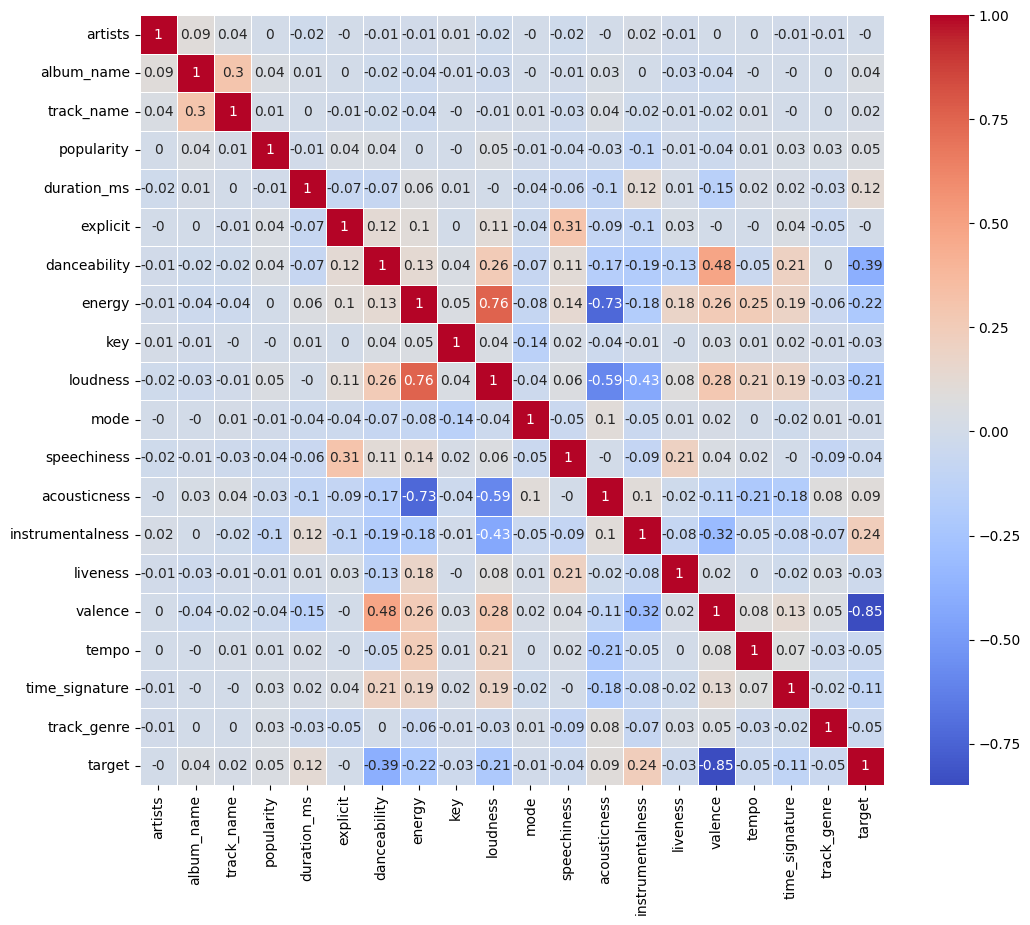

In [10]:
# calculo da correlação entre as variáveis

import seaborn as sns

correlation_matrix = df_filtrado.corr().round(2)

fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax, cmap='coolwarm')

# Analisando o equilíbrio da vaiável target

É importante que a ocorrência das classes da variável target sejam similares, umas vez que uma maior ocorrência de determinada classe pode tornar o modelo enviesado

In [11]:
round(df_filtrado['target'].value_counts(normalize=True)*100,2)

,proportion
target,
1,54.37
0,45.63


# Dividindo os dados em treino e teste

In [12]:
df_filtrado.columns

Index(['artists', 'album_name', 'track_name', 'popularity', 'duration_ms',
       'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre', 'target'],
      dtype='object')

In [13]:
from sklearn.model_selection import train_test_split

X = df_filtrado[['danceability', 'energy', 'loudness', 'acousticness', 'tempo', 'time_signature', 'liveness', 'track_genre']]
y = df_filtrado['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=4)

In [14]:
print(X_train.shape, X_test.shape)

(91200, 8) (22800, 8)


# Normalização dos dados

Aplicando o MinMaxScaler, todos os valores dos dados serão transformados em valores no intervalo de 0 e 1, essa técnica costuma ser utilizada pois dados com diferentes escalas podem distocer o modelo.

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)

X_train_escalonado = scaler.transform(X_train)
X_test_escalonado = scaler.transform(X_test)

# Função para executar modelos de machine learning

In [16]:
def aplica_modelo(modelo):
  from sklearn.metrics import roc_curve, roc_auc_score, classification_report

  # Treinando modelo
  modelo.fit(X_train_escalonado, y_train)

  # Cálculo da probabilidade e do AUC
  prob_predic = modelo.predict_proba(X_test_escalonado)
  auc = roc_auc_score(y_test, prob_predic[:,1])
  print(f'AUC: {auc}')

  # Fazendo a predição dos dados de teste e calculando o classification report
  predicao = modelo.predict(X_test_escalonado)
  print('/n Classification Report: ')
  print(classification_report(y_test, predicao))

  print('\nRoc Curve\n')
  # Fazendo previsões de probabilidades
  y_pred_prob = modelo.predict_proba(X_test_escalonado)[:, 1]

  # Cálculo da curva ROC
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

  # Cálcuo da AUC (área sob a curva ROC)
  auc = roc_auc_score(y_test, y_pred_prob)

  # Plotar a curva ROC
  plt.figure(figsize=(8, 6))
  plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc:.2f})')
  plt.plot([0, 1],[0, 1], color='gray', linestyle='--')
  plt.xlabel('Taxa de Falso Positivo')
  plt.ylabel('Taxa de Verdadeiro Positivo')
  plt.title('Curva ROC')
  plt.legend(loc='lower right')
  plt.show()

  # Converte probabilidades em classes preditas (0 ou 1)
  y_pred = (y_pred_prob > 0.5).astype(int)

# Regressão Logística

"Regressão logística" é um método bastante utilizada para classificação binária, onde o modelo calcula a probabilidade de um evento binário acontecer.

AUC: 0.769981110756556
/n Classification Report: 
              precision    recall  f1-score   support

           0       0.66      0.67      0.67     10403
           1       0.72      0.72      0.72     12397

    accuracy                           0.69     22800
   macro avg       0.69      0.69      0.69     22800
weighted avg       0.69      0.69      0.69     22800


Roc Curve



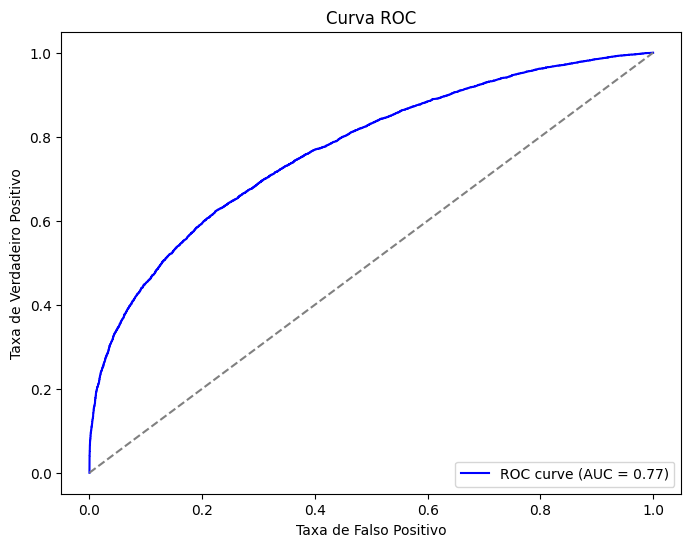

In [17]:
from sklearn.linear_model import LogisticRegression

modelo_logistico = LogisticRegression()
aplica_modelo(modelo_logistico)

# KNN (K-Nearest Neighbors)

O "KNN" determina o valor ou classe de um novo dado com base nos seus K vizinhos mais próximos

AUC: 0.807749532975713
/n Classification Report: 
              precision    recall  f1-score   support

           0       0.73      0.71      0.72     10403
           1       0.76      0.78      0.77     12397

    accuracy                           0.75     22800
   macro avg       0.75      0.74      0.74     22800
weighted avg       0.75      0.75      0.75     22800


Roc Curve



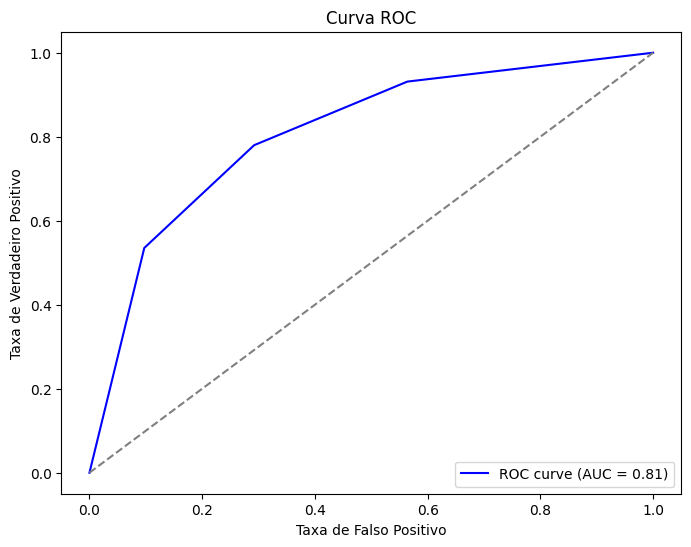

In [19]:
from sklearn.neighbors import KNeighborsClassifier

modelo_knn = KNeighborsClassifier(n_neighbors=3)
aplica_modelo(modelo_knn)

# Random Forest

O modelo "Random Forest" cria uma floresta com várias árvores de decisão, onde cada árvore é treinada com um subconjunto aleatório dos dados. A classe do novo dado é determinada com base na maioria dos votos das árvores

AUC: 0.9192859108103933
/n Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.82      0.82     10403
           1       0.85      0.85      0.85     12397

    accuracy                           0.84     22800
   macro avg       0.83      0.83      0.83     22800
weighted avg       0.84      0.84      0.84     22800


Roc Curve



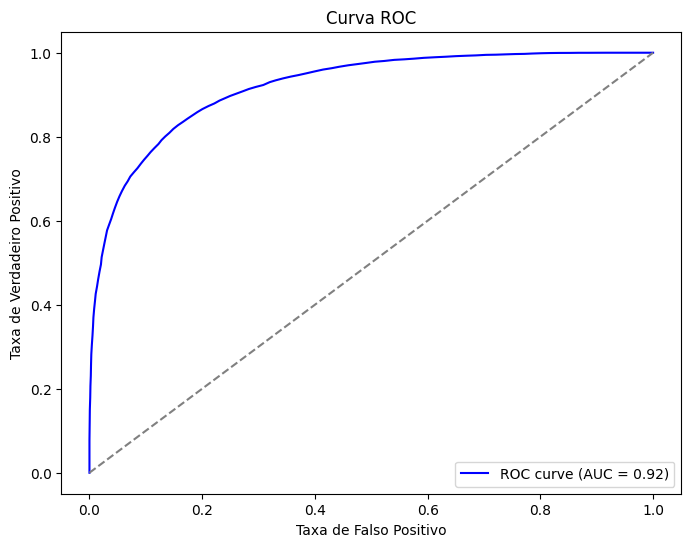

In [30]:
from sklearn.ensemble import RandomForestClassifier

modelo_random_forest = RandomForestClassifier(n_estimators=100, random_state=3)
aplica_modelo(modelo_random_forest)

Este modelo com estes parâmetros teve um bom resultado, porém no próximo passo irei testar outros parâmetros para tetar encontrar uma melhor performace.

# Utilizando Grid Search para testar novos parâmetros

Nota: pode demorar um pouco

In [32]:
from sklearn.model_selection import GridSearchCV

# Definine parâmetros que serão testados
param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [5, 10, 15]}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='f1', n_jobs=1)

# Ajusta o modelo ao conjunto de dados
grid_search.fit(X_train_escalonado, y_train)

rf_params = grid_search.best_params_
print('Melhores parâmetros:', rf_params)

Melhores parâmetros: {'max_depth': 15, 'n_estimators': 200}


Testando os melhores parâmetros

AUC: 0.886061000376448
/n Classification Report: 
              precision    recall  f1-score   support

           0       0.78      0.78      0.78     10403
           1       0.82      0.82      0.82     12397

    accuracy                           0.80     22800
   macro avg       0.80      0.80      0.80     22800
weighted avg       0.80      0.80      0.80     22800


Roc Curve



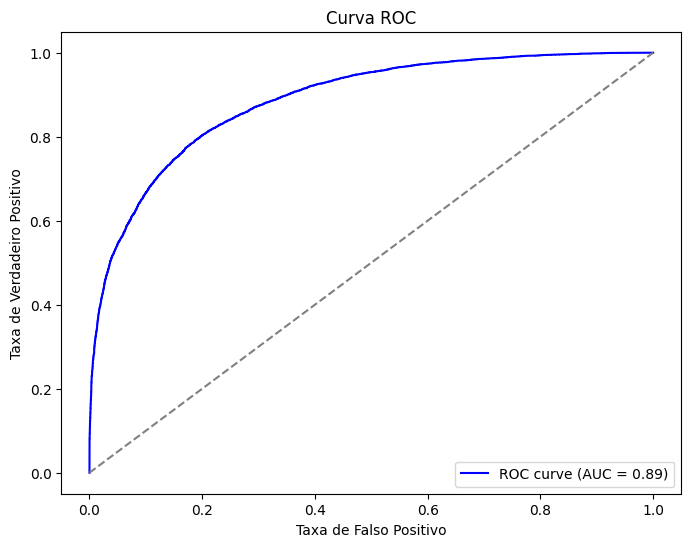

In [33]:
from sklearn.ensemble import RandomForestClassifier

modelo_random_forest = RandomForestClassifier(max_depth=15, n_estimators=200)
aplica_modelo(modelo_random_forest)